In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.lines import Line2D

In [11]:
df = pd.read_csv('FOX0_3.csv', sep=",")

In [15]:
df.head(10)

,id,con_f,sd,diag,treat
0,K001 i6,0.000030,0.000003,control,vehicle
1,K001 i6 10 nM,0.000029,0.000001,control,MPH
2,K005 z13,0.000046,0.000003,control,vehicle
3,K005 z13 10 nM,0.000053,0.000005,control,MPH
4,K011 c10,0.000029,0.000002,control,vehicle
5,K011 c10 10 nM,0.000034,0.000002,control,MPH
6,K013 c39,0.000032,0.000002,control,vehicle
7,K013 c39 10 nM,0.000033,0.000009,control,MPH
8,K015 c1,0.000032,0.000012,control,vehicle
9,K015 c1 10 nM,0.000027,0.000006,control,MPH


In [14]:
df[df['diag'] == 'control'].shape


(12, 5)

In [16]:
df[df['diag'] == 'ADHD'].shape


(10, 5)

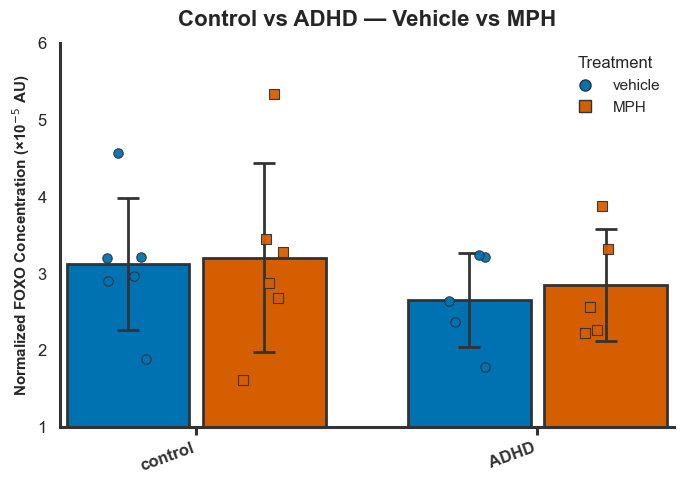

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

sns.set_theme(style="white", rc={"axes.grid": False})

# --- Config ---
MEAS = "con_f"                           # FOXO concentration
DIAG_ORDER  = ["control", "ADHD"]        # x-groups
TREAT_ORDER = ["vehicle", "MPH"]         # bars within each group

# Colorblind-safe colors + shapes
COLOR = {"vehicle": "#0072B2", "MPH": "#D55E00"}   # blue, vermilion
MARK  = {"vehicle": "o",        "MPH": "s"}        # circle, square

SCALE = 1e5  # ×10^-5 AU for plotting

# --- Data (plotting scale only) ---
df_sub = df[df["diag"].isin(DIAG_ORDER) & df["treat"].isin(TREAT_ORDER)].copy()
df_sub["norm_plot"] = df_sub[MEAS] * SCALE

# --- Layout for grouped bars ---
x_base = np.arange(len(DIAG_ORDER))      # [0, 1]
group_width = 0.80                       # total width per diagnosis group
bar_width   = (group_width / 2) * 0.90   # each bar width
offsets     = {-1: -group_width/4, +1: group_width/4}  # left/right bar centers

# Map (diag, treat) -> x center
x_center = {}
for i, diag in enumerate(DIAG_ORDER):
    x_center[(diag, "vehicle")] = x_base[i] + offsets[-1]
    x_center[(diag, "MPH")]     = x_base[i] + offsets[+1]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7,5))
rng = np.random.default_rng(0)
jitter_frac = 0.35  # fraction of bar_width for horizontal jitter

for dia in DIAG_ORDER:
    for treat in TREAT_ORDER:
        sub = df_sub[(df_sub["diag"] == dia) & (df_sub["treat"] == treat)]
        if sub.empty:
            continue

        xc = x_center[(dia, treat)]

        # bar (mean) + SD error bar
        y_mean = sub["norm_plot"].mean()
        y_sd   = sub["norm_plot"].std(ddof=1)

        ax.bar(xc, y_mean, width=bar_width, color=COLOR[treat],
               edgecolor="0.2", linewidth=2.0, align='center', zorder=2)
        ax.errorbar(xc, y_mean, yerr=y_sd, fmt="none", ecolor="0.2",
                    elinewidth=2.0, capsize=8, capthick=2.0, zorder=3)

        # points neatly inside each bar
        xs = xc + (rng.random(len(sub)) - 0.5) * (jitter_frac * bar_width)
        ax.scatter(xs, sub["norm_plot"].to_numpy(),
                   s=46, marker=MARK[treat],
                   facecolor=COLOR[treat], edgecolor="0.2",
                   linewidth=0.8, alpha=0.95, zorder=4)

# --- Legend (color + shape encode treatment) ---
handles = [
    Line2D([0],[0], marker=MARK["vehicle"], linestyle="None", label="vehicle",
           markerfacecolor=COLOR["vehicle"], markeredgecolor="0.2", markersize=8),
    Line2D([0],[0], marker=MARK["MPH"], linestyle="None", label="MPH",
           markerfacecolor=COLOR["MPH"], markeredgecolor="0.2", markersize=8),
]
ax.legend(handles=handles, frameon=False, title="Treatment")

# --- Styling ---
for side in ["bottom", "left"]:
    ax.spines[side].set_linewidth(2.2)
    ax.spines[side].set_color("0.2")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# --- X axis: ticks & labels (force visible ticks) ---
ax.set_xlim(x_base[0] - group_width/2, x_base[-1] + group_width/2)
ax.set_xticks(x_base)
ax.set_xticklabels(DIAG_ORDER, rotation=20, ha="right",
                   fontsize=12, weight="bold", color="0.2")
ax.tick_params(axis="x", which="both", bottom=True, top=False,
               length=6, width=2.2, color="0.2")

# --- Y axis formatting ---
ax.set_ylim(1, 6)  # if you want fixed 1..6
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
ax.tick_params(axis="y", which="major", width=2.2, color="0.2", labelsize=12)

exp = -int(np.log10(SCALE))  # negative exponent for label
ax.set_ylabel(f"Normalized FOXO Concentration (×10$^{{{exp}}}$ AU)",
              fontsize=11, weight="bold")

ax.set_xlabel("")
ax.set_title("Control vs ADHD — Vehicle vs MPH",
             fontsize=16, weight="bold", pad=12)

plt.tight_layout()
plt.savefig("FOXO_grouped_by_diagnosis_NPC.png", bbox_inches="tight", dpi=300)
plt.show()


T-test (vehicle): t=-1.066, p=3.146e-01
Mann–Whitney U: U=11.000, p=5.368e-01
Cohen's d: -0.624
Hedges' g (bias-corrected d): -0.571
95% CI for mean difference: [-1.483e-05, 5.347e-06]


C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:64: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.2'}` instead.

  ax = sns.barplot(
C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:64: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2.2}` instead.

  ax = sns.barplot(


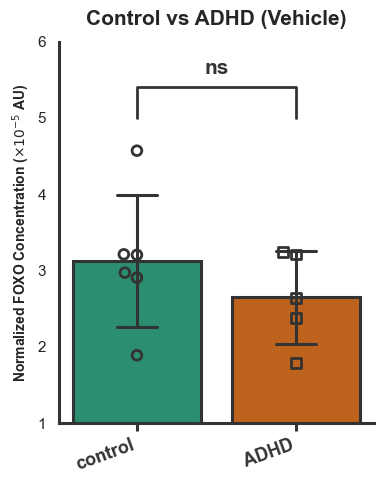

T-test (MPH): t=-0.599, p=5.652e-01
Mann–Whitney U: U=12.000, p=6.623e-01
Cohen's d: -0.346
Hedges' g (bias-corrected d): -0.316
95% CI for mean difference: [-1.721e-05, 1.008e-05]


C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:193: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(
C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:193: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.2'}` instead.

  ax = sns.barplot(
C:\Users\micha\AppData\Local\Temp\ipykernel_12984\4015204720.py:193: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2.2}` instead.

  ax = sns.barplot(


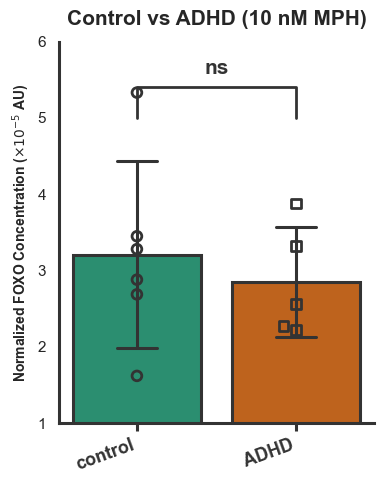

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from matplotlib.lines import Line2D

# --- Theme: NO GRID ---
sns.set_theme(style="white", rc={"axes.grid": False})

# =========================================================
# Common settings: lock scale units and y-axis range
# =========================================================
SCALE = 1e5           # keep units as ×10^-5
YMIN, YMAX = 1.0, 6.0 # exact same y-axis for both plots
YTICKS = np.arange(YMIN, YMAX + 0.001, 1.0)

# =========================================================
# 1) VEHICLE
# =========================================================
df_veh = df[df["treat"] == "vehicle"].copy()

# --- Stats on ORIGINAL scale (do not scale for testing) ---
adhd = df_veh[df_veh["diag"] == "ADHD"]["con_f"].dropna()
control = df_veh[df_veh["diag"] == "control"]["con_f"].dropna()
t_stat, p_val = stats.ttest_ind(adhd, control, equal_var=False, nan_policy="omit")

# --- Effect size (Cohen's d, pooled SD) ---
n1, n2 = len(adhd), len(control)
mean1, mean2 = adhd.mean(), control.mean()
sd1, sd2 = adhd.std(ddof=1), control.std(ddof=1)
pooled_sd = np.sqrt(((n1 - 1)*sd1**2 + (n2 - 1)*sd2**2) / (n1 + n2 - 2))
cohens_d = (mean1 - mean2) / pooled_sd

# --- Hedges' g ---
df_pooled = n1 + n2 - 2
J = 1 - (3 / (4*df_pooled - 1)) if df_pooled > 1 else 1.0
hedges_g = cohens_d * J

# --- 95% CI for mean difference (Welch) ---
diff = mean1 - mean2
se_diff = np.sqrt(sd1**2/n1 + sd2**2/n2)
df_welch = (sd1**2/n1 + sd2**2/n2)**2 / (
    (sd1**2/n1)**2/(n1-1) + (sd2**2/n2)**2/(n2-1)
)
ci_low, ci_high = stats.t.interval(0.95, df=df_welch, loc=diff, scale=se_diff)

# --- Mann–Whitney U (kept for info; ignore if parametric-only) ---
u_stat, p_u = stats.mannwhitneyu(adhd, control, alternative="two-sided")

print(f"T-test (vehicle): t={t_stat:.3f}, p={p_val:.3e}")
print(f"Mann–Whitney U: U={u_stat:.3f}, p={p_u:.3e}")
print(f"Cohen's d: {cohens_d:.3f}")
print(f"Hedges' g (bias-corrected d): {hedges_g:.3f}")
print(f"95% CI for mean difference: [{ci_low:.3e}, {ci_high:.3e}]")

# --- Scale for plotting (×10⁻⁵ units) ---
df_veh["norm_plot"] = df_veh["con_f"] * SCALE

# --- Plot ---
plt.figure(figsize=(4,5))
order = ["control", "ADHD"]   # ensure consistent order

ax = sns.barplot(
    data=df_veh,
    x="diag",
    y="norm_plot",
    order=order,
    ci="sd",
    capsize=0.25,
    edgecolor="0.2",
    errwidth=2.2,
    lw=2.2,
    palette=["#1B9E77", "#D95F02"],
    errcolor="0.2"
)

# --- Swarm with distinct markers ---
marker_map = {"control": "o", "ADHD": "s"}
color_map  = {"control": "#1B9E77", "ADHD": "#D95F02"}
for grp in order:
    sns.swarmplot(
        data=df_veh[df_veh["diag"] == grp],
        x="diag",
        y="norm_plot",
        order=order,
        marker=marker_map[grp],
        s=7,
        edgecolor="0.2",
        linewidth=2.0,
        facecolor="none",
        color=color_map[grp],
        ax=ax
    )

# --- Lock Y-axis to 1…6 (in ×10⁻⁵ units) ---
ax.set_ylim(YMIN, YMAX)
ax.set_yticks(YTICKS)

# --- Significance bracket anchored near the top (consistent across plots) ---
yrng = YMAX - YMIN
off = 0.08 * yrng
y1, y2 = YMAX - 2.5*off, YMAX - 1.5*off
ax.plot([0, 0, 1, 1], [y1, y2, y2, y1], color="0.2", lw=2.0)
label = "ns" if p_val >= 0.05 else "*"
ax.text(0.5, YMAX - 1.2*off, label, ha="center", va="bottom",
        fontsize=15, weight="bold", color="0.2")

# --- Styling (no grid + visible ticks) ---
ax.grid(False)
for side in ["bottom", "left"]:
    ax.spines[side].set_linewidth(2.2)
    ax.spines[side].set_color("0.2")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Explicit x ticks at bar centers with tick marks
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, fontsize=13, rotation=20, ha="right",
                   fontweight="bold", color="0.2")
ax.tick_params(axis="x", which="major", bottom=True, length=6, width=2.2, color="0.2")

# Remove default x-axis label ("diag")
ax.set_xlabel("")

# Y-axis label with proper superscript minus based on SCALE (still 10^-5)
exp = int(np.log10(SCALE))
ylabel = r"Normalized FOXO Concentration ($\times 10^{-%d}$ AU)" % exp
ax.set_ylabel(ylabel, fontsize=10, weight="bold")

# Title
ax.set_title("Control vs ADHD (Vehicle)", fontsize=15, weight="bold", pad=12)

# Legend
handles = [
    Line2D([0],[0], marker='o', linestyle='None', label='control',
           markerfacecolor='none', markeredgecolor='0.2', markersize=7),
    Line2D([0],[0], marker='s', linestyle='None', label='ADHD',
           markerfacecolor='none', markeredgecolor='0.2', markersize=7),
]

plt.tight_layout()
plt.savefig("FOXO_Vehicle_ADHD_vs_Control_NPC.png", bbox_inches="tight", dpi=300)
plt.show()


# =========================================================
# 2) MPH (10 nM)
# =========================================================
df_treat = df[df["treat"] == "MPH"].copy()

# --- Stats on ORIGINAL scale (do not scale for testing) ---
adhd = df_treat[df_treat["diag"] == "ADHD"]["con_f"].dropna()
control = df_treat[df_treat["diag"] == "control"]["con_f"].dropna()
t_stat, p_val = stats.ttest_ind(adhd, control, equal_var=False, nan_policy="omit")

# --- Effect size (Cohen's d, pooled SD) ---
n1, n2 = len(adhd), len(control)
mean1, mean2 = adhd.mean(), control.mean()
sd1, sd2 = adhd.std(ddof=1), control.std(ddof=1)
pooled_sd = np.sqrt(((n1 - 1)*sd1**2 + (n2 - 1)*sd2**2) / (n1 + n2 - 2))
cohens_d = (mean1 - mean2) / pooled_sd

# --- Hedges' g ---
df_pooled = n1 + n2 - 2
J = 1 - (3 / (4*df_pooled - 1)) if df_pooled > 1 else 1.0
hedges_g = cohens_d * J

# --- 95% CI for mean difference (Welch) ---
diff = mean1 - mean2
se_diff = np.sqrt(sd1**2/n1 + sd2**2/n2)
df_welch = (sd1**2/n1 + sd2**2/n2)**2 / (
    (sd1**2/n1)**2/(n1-1) + (sd2**2/n2)**2/(n2-1)
)
ci_low, ci_high = stats.t.interval(0.95, df=df_welch, loc=diff, scale=se_diff)

# --- Mann–Whitney U (kept for info; ignore if parametric-only) ---
u_stat, p_u = stats.mannwhitneyu(adhd, control, alternative="two-sided")

print(f"T-test (MPH): t={t_stat:.3f}, p={p_val:.3e}")
print(f"Mann–Whitney U: U={u_stat:.3f}, p={p_u:.3e}")
print(f"Cohen's d: {cohens_d:.3f}")
print(f"Hedges' g (bias-corrected d): {hedges_g:.3f}")
print(f"95% CI for mean difference: [{ci_low:.3e}, {ci_high:.3e}]")

# --- Scale for plotting (×10⁻⁵ units) ---
df_treat["norm_plot"] = df_treat["con_f"] * SCALE

# --- Plot ---
plt.figure(figsize=(4,5))
order = ["control", "ADHD"]   # ensure consistent order

ax = sns.barplot(
    data=df_treat,
    x="diag",
    y="norm_plot",
    order=order,
    ci="sd",
    capsize=0.25,
    edgecolor="0.2",
    errwidth=2.2,
    lw=2.2,
    palette=["#1B9E77", "#D95F02"],
    errcolor="0.2"
)

# --- Swarm with distinct markers ---
for grp in order:
    sns.swarmplot(
        data=df_treat[df_treat["diag"] == grp],
        x="diag",
        y="norm_plot",
        order=order,
        marker=marker_map[grp],
        s=7,
        edgecolor="0.2",
        linewidth=2.0,
        facecolor="none",
        color=color_map[grp],
        ax=ax
    )

# --- Lock Y-axis to 1…6 (in ×10⁻⁵ units) ---
ax.set_ylim(YMIN, YMAX)
ax.set_yticks(YTICKS)

# --- Significance bracket anchored near the top (same as vehicle) ---
yrng = YMAX - YMIN
off = 0.08 * yrng
y1, y2 = YMAX - 2.5*off, YMAX - 1.5*off
ax.plot([0, 0, 1, 1], [y1, y2, y2, y1], color="0.2", lw=2.0)
label = "ns" if p_val >= 0.05 else "*"
ax.text(0.5, YMAX - 1.2*off, label, ha="center", va="bottom",
        fontsize=15, weight="bold", color="0.2")

# --- Styling (no grid + visible ticks) ---
ax.grid(False)
for side in ["bottom", "left"]:
    ax.spines[side].set_linewidth(2.2)
    ax.spines[side].set_color("0.2")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Explicit x ticks at bar centers with tick marks
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, fontsize=13, rotation=20, ha="right",
                   fontweight="bold", color="0.2")
ax.tick_params(axis="x", which="major", bottom=True, length=6, width=2.2, color="0.2")

# Remove default x-axis label ("diag")
ax.set_xlabel("")

# Y-axis label with proper superscript minus based on SCALE (still 10^-5)
exp = int(np.log10(SCALE))
ylabel = r"Normalized FOXO Concentration ($\times 10^{-%d}$ AU)" % exp
ax.set_ylabel(ylabel, fontsize=10, weight="bold")

# Title
ax.set_title("Control vs ADHD (10 nM MPH)", fontsize=15, weight="bold", pad=12)

# Legend
handles = [
    Line2D([0],[0], marker='o', linestyle='None', label='control',
           markerfacecolor='none', markeredgecolor='0.2', markersize=7),
    Line2D([0],[0], marker='s', linestyle='None', label='ADHD',
           markerfacecolor='none', markeredgecolor='0.2', markersize=7),
]

plt.tight_layout()
plt.savefig("FOXO_MPH_ADHD_vs_Control_NPC.png", bbox_inches="tight", dpi=300)
plt.show()


In [20]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ---- Subset to the 2×2 and clean ----
df2 = df[df["diag"].isin(["control", "ADHD"]) & df["treat"].isin(["vehicle", "MPH"])].copy()
df2 = df2.dropna(subset=["con_f"])

# make factors explicit (set order for reproducible tables/plots)
df2["diag"]  = pd.Categorical(df2["diag"],  categories=["control", "ADHD"], ordered=True)
df2["treat"] = pd.Categorical(df2["treat"], categories=["vehicle", "MPH"],  ordered=True)

# ---- Two-way ANOVA with interaction (original scale) ----
model = ols("con_f ~ C(diag) * C(treat)", data=df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II SS; use typ=3 if you prefer
print("\nANOVA (Type II SS):")
print(anova_table)

# Partial eta-squared for each effect
ss_resid = anova_table.loc["Residual", "sum_sq"]
terms = ["C(diag)", "C(treat)", "C(diag):C(treat)"]
eta_p = anova_table.loc[terms, "sum_sq"] / (anova_table.loc[terms, "sum_sq"] + ss_resid)
eta_p.name = "partial_eta_sq"
print("\nPartial eta-squared:")
print(eta_p)

# ---- Assumption checks ----
W, p_shapiro = stats.shapiro(model.resid)
print(f"\nShapiro-Wilk on residuals: W={W:.3f}, p={p_shapiro:.3f}")

cells = [df2[(df2["diag"]==d) & (df2["treat"]==t)]["con_f"].values
         for d in ["control","ADHD"] for t in ["vehicle","MPH"]]
lev_F, lev_p = stats.levene(*cells, center="median")
print(f"Levene's test (median): F={lev_F:.3f}, p={lev_p:.3f}")

# Optional robustness (uncomment to view HC3-robust coefficient tests)
# print(model.get_robustcov_results(cov_type="HC3").summary())

# ---- Post hoc: Tukey HSD across the 4 cells ----
# FIX: cast to str before concatenation to avoid Categorical + str error
df2["cell"] = df2["diag"].astype(str).str.cat(df2["treat"].astype(str), sep=" | ")
# keep a readable, fixed order
cell_order = ["control | vehicle", "control | MPH", "ADHD | vehicle", "ADHD | MPH"]
df2["cell"] = pd.Categorical(df2["cell"], categories=cell_order, ordered=True)

tuk = pairwise_tukeyhsd(endog=df2["con_f"], groups=df2["cell"], alpha=0.05)
print("\nTukey HSD (4 cell means):")
print(tuk)

# ---- (Optional) Simple effects if interaction is notable ----
for d in ["control","ADHD"]:
    v = df2[(df2["diag"]==d) & (df2["treat"]=="vehicle")]["con_f"]
    m = df2[(df2["diag"]==d) & (df2["treat"]=="MPH")]["con_f"]
    t, p = stats.ttest_ind(v, m, equal_var=False, nan_policy="omit")
    print(f"Treatment effect within {d}: t={t:.3f}, p={p:.3f}")

for tmt in ["vehicle","MPH"]:
    c = df2[(df2["treat"]==tmt) & (df2["diag"]=="control")]["con_f"]
    a = df2[(df2["treat"]==tmt) & (df2["diag"]=="ADHD")]["con_f"]
    t, p = stats.ttest_ind(c, a, equal_var=False, nan_policy="omit")
    print(f"Diagnosis effect within {tmt}: t={t:.3f}, p={p:.3f}")



ANOVA (Type II SS):
                        sum_sq    df         F    PR(>F)
C(diag)           9.403284e-11   1.0  1.146834  0.298363
C(treat)          1.010749e-11   1.0  0.123272  0.729588
C(diag):C(treat)  1.889748e-12   1.0  0.023048  0.881022
Residual          1.475881e-09  18.0       NaN       NaN

Partial eta-squared:
C(diag)             0.059897
C(treat)            0.006802
C(diag):C(treat)    0.001279
Name: partial_eta_sq, dtype: float64

Shapiro-Wilk on residuals: W=0.966, p=0.614
Levene's test (median): F=0.350, p=0.790

Tukey HSD (4 cell means):
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1           group2      meandiff p-adj  lower upper reject
-------------------------------------------------------------------
    ADHD | MPH    ADHD | vehicle     -0.0 0.9849  -0.0   0.0  False
    ADHD | MPH     control | MPH      0.0 0.9142  -0.0   0.0  False
    ADHD | MPH control | vehicle      0.0  0.958  -0.0   0.0  False
ADHD | vehicle     control 